In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].transform(lambda val: val.fillna(val.mean()))

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.fillna(0)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


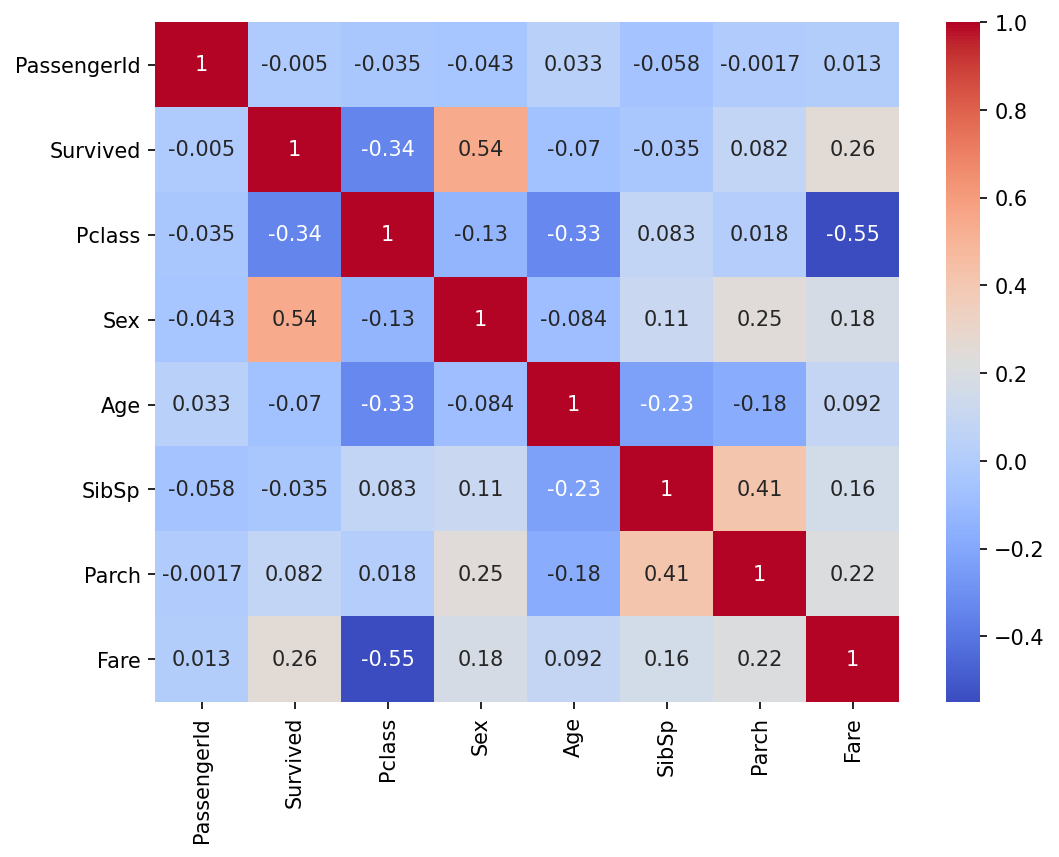

In [9]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

In [10]:
np.abs(df.corr()['Survived']).sort_values().tail(6)

Age         0.069809
Parch       0.081629
Fare        0.257307
Pclass      0.338481
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [11]:
X = df.drop(['Survived', 'Cabin', 'Name', 'Embarked', 'Ticket'], axis=1)
y = df['Survived']

In [12]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,3,1,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,3,1,29.699118,1,2,23.4500
889,890,1,0,26.000000,0,0,30.0000


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [17]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1, 30))
param_grid = {'knn__n_neighbors': k_values}

In [18]:
fullcvclassifier = GridSearchCV(pipe, param_grid, cv=5,scoring='accuracy')

In [19]:
fullcvclassifier

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [20]:
fullcvclassifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [21]:
fullcvclassifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=7),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [22]:
y_pred = fullcvclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  8],
       [ 7, 29]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



![](http://)***FINAL MODEL EVALUATION WITH K=7***

In [25]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [26]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
test_df['Age'] = test_df['Age'].transform(lambda val: val.fillna(val.mean()))
test_df['Fare'] = test_df['Fare'].transform(lambda val: val.fillna(val.mean()))
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df = test_df.drop(['Cabin', 'Name', 'Embarked', 'Ticket'], axis=1)

In [28]:
scaler = StandardScaler()
knn7 = KNeighborsClassifier(n_neighbors=7)
operations = [('scaler',scaler),('knn7',knn7)]

In [29]:
pipe = Pipeline(operations)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn7', KNeighborsClassifier(n_neighbors=7))])

In [31]:
pipe_pred = pipe.predict(test_df)

In [32]:
test_df['Survived'] = pipe_pred

In [33]:
pred_results = test_df[['PassengerId', 'Survived']]

In [34]:
pred_results = pred_results.set_index('PassengerId')

In [35]:
pred_results.to_csv('/kaggle/working/submission.csv')